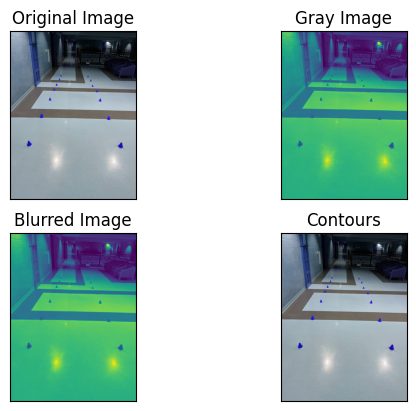

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("red.png")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# Find contours
contours, _ = cv2.findContours(blurred, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# with matplotlib show progress from image img to gray to blurred to contours
plt.subplot(221), plt.imshow(img)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(gray)
plt.title("Gray Image"), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(blurred)
plt.title("Blurred Image"), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(img)
plt.title("Contours"), plt.xticks([]), plt.yticks([])
plt.show()


Cone Centroids:  [(907, 1209)]
Left Cones:  [(907, 1209)]
Right Cones:  []
Line Coefficients:  [  0.66648291 604.5       ]


/var/folders/ns/xpjxv88s5wgbh8pvcj5j0t1c0000gn/T/ipykernel_17257/3185376415.py:30: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, 1)


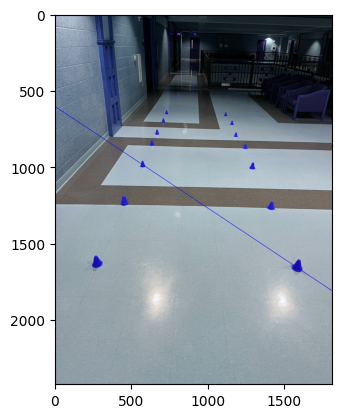

In [12]:

cone_centroids = []
for contour in contours:
    if cv2.contourArea(contour) > 100:  # Threshold can be adjusted
        M = cv2.moments(contour)
        if M["m00"] != 0:  # Avoid division by zero
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cone_centroids.append((cX, cY))
print("Cone Centroids: ", cone_centroids)  # Print cone centroids for debugging

# Separate centroids for left and right sides
midpoint = img.shape[1] // 2
left_cones = [pt for pt in cone_centroids if pt[0] < midpoint]
right_cones = [pt for pt in cone_centroids if pt[0] > midpoint]
print("Left Cones: ", left_cones)  # Print left cones for debugging
print("Right Cones: ", right_cones)  # Print right cones for debugging

# Draw centroids on image
for pt in cone_centroids:
    # draw a circle on the image
    cv2.circle(img, pt, 5, (0, 255, 0), -1)
    


# Function to fit and draw a line using points
def fit_and_draw(points, img):
    if points:
        x = [pt[0] for pt in points]
        y = [pt[1] for pt in points]
        coefficients = np.polyfit(x, y, 1)
        polynomial = np.poly1d(coefficients)
        start_y = int(polynomial(0))
        end_y = int(polynomial(img.shape[1]))
        cv2.line(img, (0, start_y), (img.shape[1], end_y), (0, 0, 255), 2)
        print("Line Coefficients: ", coefficients)  # Print line coefficients for debugging

fit_and_draw(left_cones, img)
fit_and_draw(right_cones, img)

# Save the modified image
cv2.imwrite("answer.png", img)
plt.imshow(img)  # Display the image with drawn lines
plt.show()

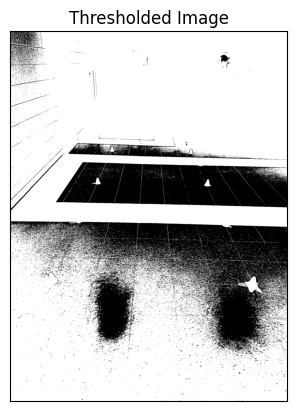

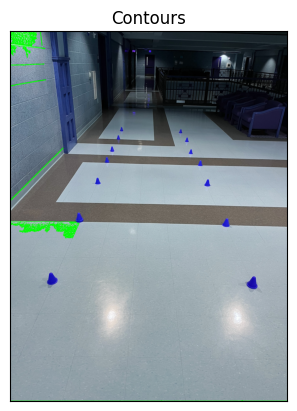

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_debug_image(title, image):
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()
# Load the image
img = cv2.imread("red.png")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# show_debug_image("Grayscale Image", gray)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (15, 15), 0)
# show_debug_image("Blurred Image", blurred)

_, thresh = cv2.threshold(gray, 177, 200, cv2.THRESH_BINARY_INV)
show_debug_image("Thresholded Image", thresh)


# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# To visualize contours
contour_image = img.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
show_debug_image("Contours", contour_image)


# Extract cone centroids
cone_centroids = []
for contour in contours:
    if cv2.contourArea(contour) > 1000:
        M = cv2.moments(contour)
        if M["m00"] != 0:  # Avoid division by zero
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cone_centroids.append((cX, cY))

# Visualizing centroids
centroid_image = img.copy()
for center in cone_centroids:
    cv2.circle(centroid_image, center, 10, (0,0,255), -1)
# show_debug_image("Centroids", centroid_image)